In [1]:
""" Neural Network.
A 2-Hidden Layers Fully Connected Neural Network (a.k.a Multilayer Perceptron)
implementation with TensorFlow. This example is using the MNIST database
of handwritten digits (http://yann.lecun.com/exdb/mnist/).
Links:
    [MNIST Dataset](http://yann.lecun.com/exdb/mnist/).
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
# Parameters
model_path = "/tmp/model.ckpt"

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
 
# tf Graph input
X = tf.placeholder("float", [None, num_input])
 
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [3]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [4]:
# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)
 
# Evaluate model
# argmax returns the index with the largest value across axes of a tensor
ans = tf.argmax(prediction, 1)
 
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
 
# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()

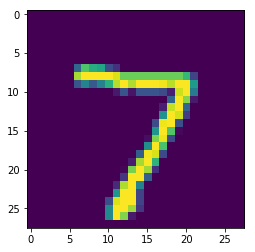

In [5]:
# Show image that we want to predict
plt.imshow(mnist.test.images[0].reshape((28, 28)))
plt.show()

In [6]:
# Running a test dataset by loading the model saved earlier
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
 
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % model_path)
 
    # Calculate the answer for the image
    print("Answer:", sess.run(ans, feed_dict={X: mnist.test.images[0:1]}))

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored from file: /tmp/model.ckpt
Answer: [7]
